In [1]:
from google.colab import drive
import pandas as pd


drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Machine learning college/WineQT.csv'

df = pd.read_csv(file_path)

df.head()



Mounted at /content/drive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [11]:
#A1
import numpy as np

class_5_data = df[df['quality'] == 5]
class_6_data = df[df['quality'] == 6]

mean_5 = np.mean(class_5_data.drop(columns=['quality', 'Id']), axis=0)
mean_6 = np.mean(class_6_data.drop(columns=['quality', 'Id']), axis=0)

std_5 = np.std(class_5_data.drop(columns=['quality', 'Id']), axis=0)
std_6 = np.std(class_6_data.drop(columns=['quality', 'Id']), axis=0)

distance_between_classes = np.linalg.norm(mean_5 - mean_6)

print("Class 5 Data:")
print(class_5_data.head())

print("\nClass 6 Data:")
print(class_6_data.head())

print("\nMean (Centroid) for Class 5:")
print(mean_5)

print("\nMean (Centroid) for Class 6:")
print(mean_6)

print("\nSpread (Standard Deviation) for Class 5:")
print(std_5)

print("\nSpread (Standard Deviation) for Class 6:")
print(std_6)

print("\nDistance between Mean Vectors (Class 5 and Class 6):", distance_between_classes)



Class 5 Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5 

Mean Fixed Acidity: 8.311111111111112
Variance of Fixed Acidity: 3.0514163507339362


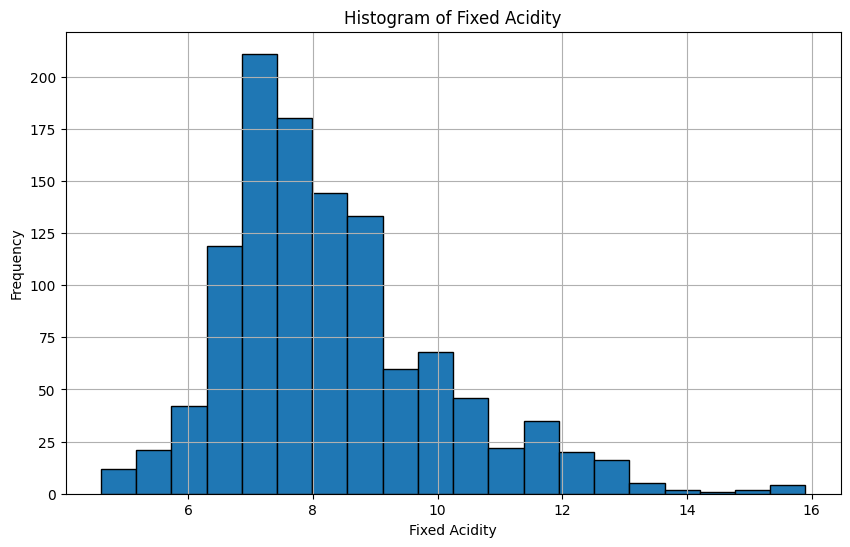

In [12]:
#A2
import matplotlib.pyplot as plt

fixed_acidity_data = df['fixed acidity']

hist, bins = np.histogram(fixed_acidity_data, bins=20)

mean_fixed_acidity = np.mean(fixed_acidity_data)
variance_fixed_acidity = np.var(fixed_acidity_data)

plt.figure(figsize=(10, 6))
plt.hist(fixed_acidity_data, bins=bins, edgecolor='k')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.title('Histogram of Fixed Acidity')
plt.grid(True)

print("Mean Fixed Acidity:", mean_fixed_acidity)
print("Variance of Fixed Acidity:", variance_fixed_acidity)

plt.show()


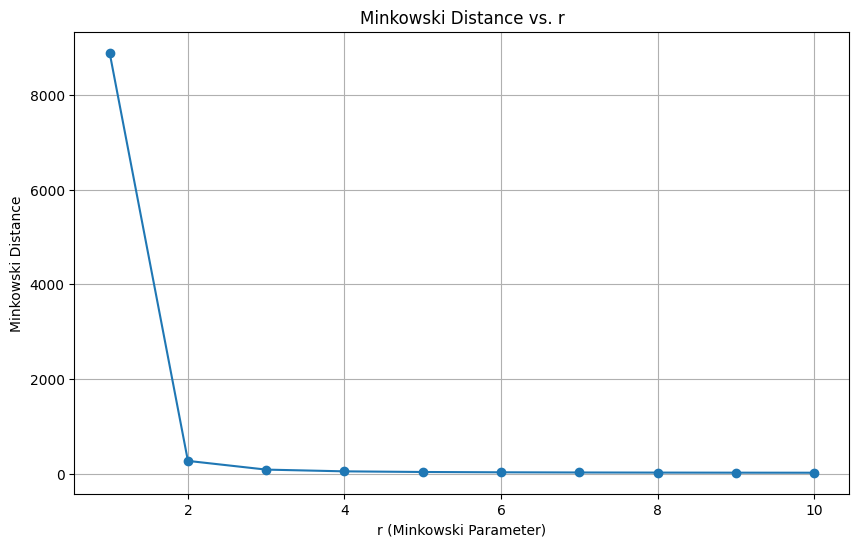

In [13]:
#A3
fixed_acidity_vector = df['fixed acidity'].values
volatile_acidity_vector = df['volatile acidity'].values

r_values = np.arange(1, 11)

minkowski_distances = []
for r in r_values:
    distance = np.linalg.norm(fixed_acidity_vector - volatile_acidity_vector, ord=r)
    minkowski_distances.append(distance)

plt.figure(figsize=(10, 6))
plt.plot(r_values, minkowski_distances, marker='o', linestyle='-')
plt.xlabel('r (Minkowski Parameter)')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)

plt.show()

In [15]:
#A4
from sklearn.model_selection import train_test_split

X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (800, 11)
X_test shape: (343, 11)
y_train shape: (800,)
y_test shape: (343,)


In [16]:
#A5
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
#A6
accuracy = neigh.score(X_test, y_test)

print("Accuracy of the k-NN classifier:", accuracy)


Accuracy of the k-NN classifier: 0.4489795918367347


In [18]:
#A7
predicted_labels = neigh.predict(X_test)

print("Predicted Class Labels for Test Data:")
print(predicted_labels)


Predicted Class Labels for Test Data:
[5 5 5 6 7 6 4 5 6 5 5 6 7 6 4 5 6 6 5 7 5 7 5 6 6 5 6 6 4 5 5 6 5 5 5 5 6
 8 6 5 6 5 6 5 6 5 5 5 5 5 7 6 6 6 6 7 5 6 5 6 5 6 4 5 7 5 7 6 5 6 5 6 5 5
 7 5 5 5 6 6 5 6 5 4 6 6 5 6 7 6 5 6 5 5 6 5 5 7 7 6 6 6 6 6 5 5 6 5 5 7 3
 5 5 5 4 6 6 5 5 5 6 6 5 5 6 5 7 5 5 7 5 5 5 5 6 5 5 5 5 6 7 5 6 6 5 5 5 6
 5 5 6 5 5 5 4 5 6 5 7 6 5 6 5 6 7 5 6 7 5 5 5 5 5 5 5 6 6 5 5 6 6 6 6 5 5
 5 5 5 5 5 6 6 7 6 6 6 5 7 5 6 5 4 5 6 7 7 5 5 7 7 6 7 5 6 6 6 5 5 6 6 5 6
 5 5 5 5 5 5 5 5 6 6 5 5 5 6 5 6 5 5 6 5 5 6 5 5 5 6 7 5 5 5 5 6 5 6 6 6 5
 5 5 6 7 6 5 5 5 6 6 6 6 7 5 6 5 3 6 6 6 5 5 5 6 6 5 7 6 5 6 7 5 6 6 5 6 5
 5 6 5 5 6 6 5 5 5 5 5 5 6 5 6 6 5 6 5 6 5 5 6 6 6 5 6 5 3 6 5 5 3 5 7 5 5
 6 6 5 7 5 5 5 6 4 5]


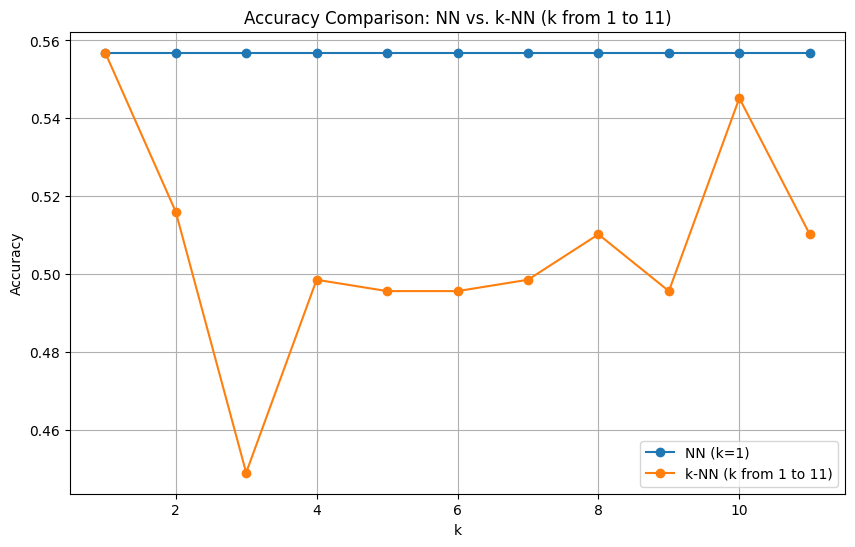

In [19]:
#A8
nn_accuracies = []
knn_accuracies = []

for k in range(1, 12):

    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    nn_classifier.fit(X_train, y_train)


    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    nn_accuracy = nn_classifier.score(X_test, y_test)

    knn_accuracy = knn_classifier.score(X_test, y_test)

    nn_accuracies.append(nn_accuracy)
    knn_accuracies.append(knn_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), nn_accuracies, label='NN (k=1)', marker='o', linestyle='-')
plt.plot(range(1, 12), knn_accuracies, label='k-NN (k from 1 to 11)', marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: NN vs. k-NN (k from 1 to 11)')
plt.legend()
plt.grid(True)

plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_test_pred)

print("Confusion Matrix (Training Data):\n", confusion_matrix_train)
print("\nConfusion Matrix (Test Data):\n", confusion_matrix_test)

print("\nClassification Report (Training Data):\n", report_train)
print("\nClassification Report (Test Data):\n", report_test)

Confusion Matrix (Training Data):
 [[  4   0   1   1   0   0]
 [  1   9   7   6   1   0]
 [  1   9 282  47   1   0]
 [  2  12  76 210  16   0]
 [  1   2  17  21  61   0]
 [  0   0   6   4   2   0]]

Confusion Matrix (Test Data):
 [[ 0  0  0  0  0  0]
 [ 0  0  5  3  1  0]
 [ 1  5 86 49  2  0]
 [ 2  4 71 54 15  0]
 [ 1  0 11 14 14  1]
 [ 0  0  1  2  1  0]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           3       0.44      0.67      0.53         6
           4       0.28      0.38      0.32        24
           5       0.72      0.83      0.77       340
           6       0.73      0.66      0.69       316
           7       0.75      0.60      0.67       102
           8       0.00      0.00      0.00        12

    accuracy                           0.71       800
   macro avg       0.49      0.52      0.50       800
weighted avg       0.70      0.71      0.70       800


Classification Report (Test Data):
               precisio

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif